In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('pair_nulos.csv')

pd.set_option('display.max_columns', None)

df.head()

,unnamed 0_x,country,density,abbreviation,birth rate,calling code,capital/major city,co2-emissions,cpi,cpi change,currency-code,fertility rate,forested area,gasoline price,unnamed 0_y,gdp,gross primary education enrollment,gross tertiary education enrollment,infant mortality,largest city,life expectancy,maternal mortality ratio,minimum wage,official language,out of pocket health expenditure,physicians per thousand,population,population labor force participation,tax revenue,total tax rate,unemployment rate,urban_population,latitud,longitud,continente,agriculture_land,land_area,armed_forces_size
0,0,Afghanistan,60.0,AF,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,0,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,NaN,NaN,Asia,58.1,652230.0,323000.000000
1,1,Albania,105.0,AL,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,NaN,NaN,Europa,43.1,28748.0,9000.000000
2,2,Algeria,18.0,DZ,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,2,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,NaN,NaN,África,17.4,2381741.0,317000.000000
3,3,Andorra,164.0,AD,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,NaN,NaN,Europa,40.0,468.0,79521.131723
4,4,Angola,26.0,AO,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,4,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,NaN,NaN,África,47.5,1246700.0,117000.000000


¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

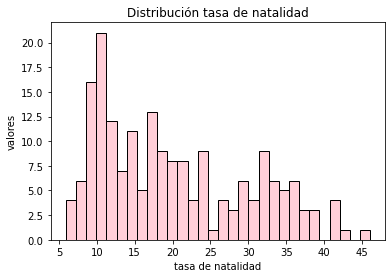

In [12]:
sns.histplot(x='birth rate', data = df, bins=30, color='pink')
plt.xlabel('tasa de natalidad')
plt.ylabel('valores')
plt.title('Distribución tasa de natalidad');


La tasa de natalidad mayor está entre 10 y 12

In [13]:
df.columns

Index(['unnamed 0_x', 'country', 'density', 'abbreviation', 'birth rate',
       'calling code', 'capital/major city', 'co2-emissions', 'cpi',
       'cpi change', 'currency-code', 'fertility rate', 'forested area',
       'gasoline price', 'unnamed 0_y', 'gdp',
       'gross primary education enrollment',
       'gross tertiary education enrollment', 'infant mortality',
       'largest city', 'life expectancy', 'maternal mortality ratio',
       'minimum wage', 'official language', 'out of pocket health expenditure',
       'physicians per thousand', 'population',
       'population labor force participation', 'tax revenue', 'total tax rate',
       'unemployment rate', 'urban_population', 'latitud', 'longitud',
       'continente', 'agriculture_land', 'land_area', 'armed_forces_size'],
      dtype='object')

¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

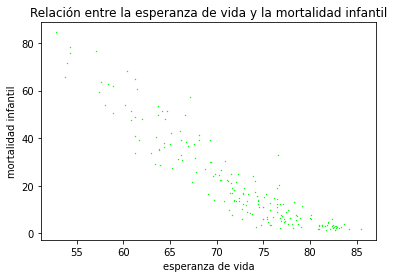

In [19]:
sns.scatterplot(x = 'life expectancy', y='infant mortality', data = df, color = 'lime', s = 2)
plt.xlabel('esperanza de vida')
plt.ylabel('mortalidad infantil')
plt.title('Relación entre la esperanza de vida y la mortalidad infantil');

Según los datos obtenidos, observamos que cuanto más alta es la esperanza de vida, es menor la mortalidad infantil. 

¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

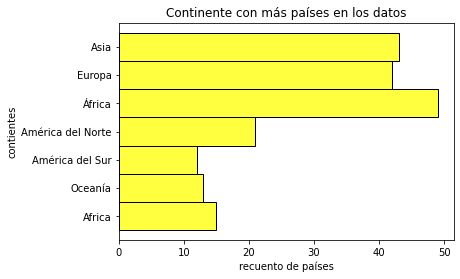

In [22]:
sns.histplot(y='continente', data = df, bins=30, color='yellow')
plt.ylabel('contientes')
plt.xlabel('recuento de países')
plt.title('Continente con más países en los datos');

In [29]:
df_continente = df.groupby("continente")["unnamed 0_x"].count().reset_index()
df_continente

,continente,unnamed 0_x
0,Africa,15
1,América del Norte,21
2,América del Sur,12
3,Asia,43
4,Europa,42
5,Oceanía,13
6,África,49


df_contiente = df.groupby("education")["id"].count().reset_index()

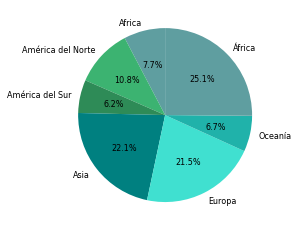

In [34]:
colores = ["cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

plt.pie("unnamed 0_x", labels= "continente",
        data = df_continente, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);